In [1]:
%matplotlib inline

import pickle
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [2]:
data = pickle.load(open('BSU27200.pkl', 'rb'))
print(f'> original data keys: {data.keys()}')

representations = data['representations']
print(f'> representations: {representations.keys()}')

distogram = data['distogram']
print(f'> distogram: {distogram.keys()}')

> original data keys: dict_keys(['distogram', 'experimentally_resolved', 'masked_msa', 'predicted_lddt', 'representations', 'structure_module', 'plddt'])
> representations: dict_keys(['msa', 'msa_first_row', 'pair', 'single', 'structure_module'])
> distogram: dict_keys(['bin_edges', 'logits'])


In [3]:
single_repre = representations['single']
print(f'single representation shape = {single_repre.shape}')

logits_disto = distogram['logits']
print(f'logits distogram shape = {logits_disto.shape}')

enzyme_len = single_repre.shape[0]
print(f'enzyme length = {enzyme_len}')

single representation shape = (266, 384)
logits distogram shape = (266, 266, 64)
enzyme length = 266


In [4]:
logits_reshaped = logits_disto.reshape(-1, 64)
logits_reshaped.shape

(70756, 64)

In [5]:
# logits distogram

scaler = StandardScaler()
scaler.fit(logits_reshaped)
logits_standard = scaler.transform(logits_reshaped)
logits_standard.shape

pca_64 = PCA(n_components=64)
pca_64.fit(logits_standard)
logits_PCA_64 = pca_64.transform(logits_standard)
print(logits_PCA_64.shape)

print('Variance explained by each of the 64 components: {}'.format(sum(pca_64.explained_variance_ratio_ * 100)))

(70756, 64)
Variance explained by each of the 64 components: 100.00000000000004


[45.8802222  39.18622776  5.42979767  3.61668138  1.17306728  0.98287801
  0.88600264  0.67088785  0.45758805  0.39388915]


Text(0, 0.5, 'Cumulative Variance (%)')

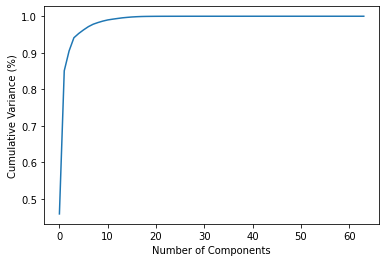

In [6]:
print(pca_64.explained_variance_ratio_[:10] * 100)

plt.plot(np.cumsum(pca_64.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance (%)')

In [7]:
pca_1 = PCA(n_components=1)
pca_1.fit(logits_standard)
logits_PCA_1 = pca_1.transform(logits_standard)
print(logits_PCA_1.shape)

print('Variance explained by each of the 1 components: {}'.format(sum(pca_1.explained_variance_ratio_ * 100)))

(70756, 1)
Variance explained by each of the 1 components: 45.88090317225351


In [8]:
logits_after_PCA = logits_PCA_1.reshape(enzyme_len, enzyme_len)
logits_after_PCA.shape

(266, 266)

In [11]:
scaler = StandardScaler()
scaler.fit(single_repre)
single_standard = scaler.transform(single_repre)
print(single_standard.shape)

pca_1 = PCA(n_components=10)
pca_1.fit(single_standard)
single_PCA_1 = pca_1.transform(single_standard)
print(single_PCA_1.shape)

print('Variance explained by each of the 2 components: {}'.format(sum(pca_1.explained_variance_ratio_ * 100)))

(266, 384)
(266, 10)
Variance explained by each of the 2 components: 55.988781690597534


In [59]:
single_after_PCA = single_PCA_1.reshape(enzyme_len)
single_after_PCA.shape

(266,)